<a href="https://colab.research.google.com/github/Abdullah-47/PaisaBazaar-Credit-Score-Prediction/blob/main/PaisaBazaar_Credit_Score_Prediction_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - PaisaBazaar Credit Score Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Abdullah-47/PaisaBazaar-Credit-Score-Prediction

# **Problem Statement**


- Find and detect patterns impacting the credit score in the dataset.
- Visualize important variables which have the most effect on the credit score
- Build ML models to classify Credit Score (`Poor`,`Standard`,`Good`) and make predictions on unseen data.
- Evaluate performance of the models built.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
!pip install imblearn
!pip install xgboost
!pip install sklearn
!pip install joblib!
!pip install os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE # Ensure imbalanced-learn is installed if you get ModuleNotFoundError
from collections import Counter
import joblib
import os
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
# Load the training data
try:
    df_train = pd.read_csv("https://huggingface.co/datasets/Abdullah4747/PaisaBazaar_Credit_Score/resolve/main/PaisaBazaar_CreditScore_data.csv")#Read the dataset uploaded on huggingface
    print("Training data loaded successfully.")
except FileNotFoundError:
    print("Error: dataset not found.")
    df_train = pd.DataFrame()  # Initialize an empty DataFrame to avoid further errors

except Exception as e:
    print(f"An error occurred while loading Dataset: {e}")
    df_train = pd.DataFrame()

Training data loaded successfully.


### Dataset First View

In [ ]:
# Dataset First Look
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_train.shape

(100000, 28)

### Dataset Information

In [ ]:
# Dataset Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_train.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_train.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

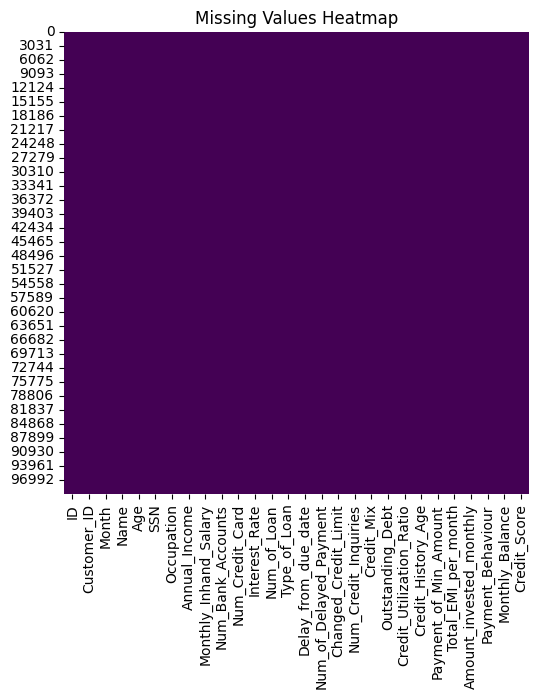

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(6, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## What did you know about your dataset?

### 1\. Basic Structure

-   100,000 rows (entries) and 28 columns (features)

-   No missing values (all columns have 100,000 non-null entries)

-   Data types:

    -   18 float columns (numerical)

    -   3 integer columns (numerical)

    -   7 object columns (categorical/text)

### 2\. Key Features

-   Customer Identification:

    -   `ID` (unique record identifier)

    -   `Customer_ID` (reusable customer identifier, e.g., Aaron Maashoh appears in multiple rows)

    -   `Name` (customer names)

-   Temporal Data:

    -   `Month` (tracks monthly records per customer)

-   Demographics:

    -   `Age`, `SSN`, `Occupation`

-   Financial Metrics:

    -   Income: `Annual_Income`, `Monthly_Inhand_Salary`

    -   Credit: `Num_Bank_Accounts`, `Num_Credit_Card`, `Interest_Rate`, `Outstanding_Debt`

    -   Loans: `Num_of_Loan`, `Type_of_Loan` (multi-value strings like "Auto Loan, Mortgage Loan")

    -   Payment Behavior: `Delay_from_due_date`, `Num_of_Delayed_Payment`, `Payment_of_Min_Amount`

    -   Credit History: `Credit_Mix` (Good/Standard/Bad), `Credit_History_Age`, `Num_Credit_Inquiries`

-   Behavioral Metrics:

    -   `Payment_Behaviour` (e.g., "High_spent_Small_value_payments")

    -   `Monthly_Balance`, `Amount_invested_monthly`, `Total_EMI_per_month`

-   Target Variable:

    -   `Credit_Score` (categorical: Good/Standard/Poor)

### 3\. Data Patterns (from Sample)

-   Time-series nature: Customers have multiple monthly entries (e.g., Aaron Maashoh has 8 months of records).

-   Credit Dynamics:

    -   Features like `Changed_Credit_Limit`, `Credit_Utilization_Ratio` track credit flexibility.

    -   `Num_of_Delayed_Payment` and `Delay_from_due_date` indicate payment punctuality.

-   Anomalies:

    -   `SSN` stored as float (should be string).

    -   `Type_of_Loan` contains concatenated strings (requires parsing).

    -   `Credit_History_Age` is a float (could be months/years).

    -   `Age` is float but should likely be integer.

### 4\. Target Variable Insights

-   `Credit_Score` is categorical with 3 classes: Good, Standard, Poor.

-   Appears linked to financial behavior:

    -   *Good credit* correlates with low delays (e.g., Aaron Maashoh: 3-8 days delay).

    -   *Poor credit* correlates with high delays (e.g., Annk: 30+ days delay, high `Num_of_Delayed_Payment`).

### 5\. Potential Use Cases

-   Credit Risk Modeling: Predict `Credit_Score` using financial/behavioral features.

-   Customer Segmentation: Group by `Payment_Behaviour` or `Occupation`.

-   Trend Analysis: Track changes in `Monthly_Balance` or `Outstanding_Debt` over months.

### 6\. Data Quality Notes

-   No missing values (unusual for real-world data; may be preprocessed).

-   Inconsistent formatting:

    -   `Type_of_Loan` entries are irregular (e.g., "Auto Loan, and Not Specified").

    -   `Payment_of_Min_Amount` has non-binary values ("No", "Yes", "NM").

-   Suspicious values:

    -   `Age` = 16 (Toonkeln) and 54 (Jasond) -- validate realism.

    -   `SSN` as float implies anonymization/transformations.

### Summary

This is a clean, time-series dataset of customer credit profiles with granular monthly financial behavior. Key focuses include payment patterns (`Delay_from_due_date`, `Num_of_Delayed_Payment`), credit health (`Credit_Mix`, `Credit_Utilization_Ratio`), and the target outcome (`Credit_Score`). Preprocessing may be needed for categorical columns like `Type_of_Loan` and `Payment_Behaviour`.

## ***2. Understanding Your Variables***

In [ ]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
# Dataset Describe
df_train.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Variables Description



Based on the column names and the output of the `df_train.describe()` function, here's a description of each variable:

**ID:** Unique identifier for each row/record. It is an integer.

**Customer_ID:** Identifier for each customer. A single customer can have multiple records across different months. It is an integer.

**Month:** The month of the record, ranging from 1 to 8. It is an integer.

**Name:** The name of the customer. This is an object type, likely a string.

**Age:** The age of the customer. It is a float, with a minimum age of 14 and a maximum of 56.

**SSN:** Social Security Number of the customer. Stored as a float, which might indicate anonymization or a need for type conversion to string.

**Occupation:** The occupation of the customer. This is an object type, likely a string representing different job titles.

**Annual_Income:** The annual income of the customer. It is a float, with a wide range from 7005.93 to 179987.28.

**Monthly_Inhand_Salary:** The monthly in-hand salary of the customer. It is a float, derived from the annual income.

**Num_Bank_Accounts:** The number of bank accounts the customer holds. It is a float, ranging from 0 to 11.

**Num_Credit_Card:** The number of credit cards the customer holds. It is a float, ranging from 0 to 11.

**Interest_Rate:** The interest rate on the customer's loans. It is a float, ranging from 1 to 34.

**Num_of_Loan:** The number of loans the customer has. It is a float.

**Type_of_Loan:** The types of loans the customer has. This is an object type, likely a string that can contain multiple loan types separated by commas.

**Delay_from_due_date:** The average number of days the customer delays payment from the due date. It is a float, ranging from 0 to 62.

**Num_of_Delayed_Payment:** The number of delayed payments the customer has made. It is a float, ranging from 0 to 25.

**Changed_Credit_Limit:** The amount by which the credit limit has changed. It is a float, ranging from 0.5 to 29.98.

**Num_Credit_Inquiries:** The number of credit inquiries made for the customer. It is a float, ranging from 0 to 17.

**Credit_Mix:** The mix of the customer's credit accounts (e.g., Good, Standard, Bad). This is an object type, likely a string.

**Outstanding_Debt:** The amount of outstanding debt the customer has. It is a float, ranging from 0.23 to 4998.07.

**Credit_Utilization_Ratio:** The ratio of credit used to the total credit available. It is a float, ranging from 20 to 50.

**Credit_History_Age:** The age of the customer's credit history. It is a float, ranging from 1 to 404. This likely represents months.

**Payment_of_Min_Amount:** Whether the customer pays the minimum amount due. This is an object type, likely a string with values like "Yes", "No", or "NM".

**Total_EMI_per_month:** The total Equated Monthly Installment (EMI) the customer pays. It is a float, ranging from 0 to 1779.10.

**Amount_invested_monthly:** The amount invested by the customer monthly. It is a float, ranging from 0 to 434.19.

**Payment_Behaviour:** The payment behavior of the customer (e.g., High_spent_Small_value_payments). This is an object type, likely a string.

**Monthly_Balance:** The monthly balance of the customer's accounts. It is a float, ranging from 0.007760 to 1183.930696.

**Credit_Score:** The credit score of the customer (target variable). This is an object type, likely a string with values like "Good", "Standard", or "Poor".

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df_train.columns:
    unique_values = df_train[column].unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for ID: [  5634   5635   5636 ... 155627 155628 155629]
Unique values for Customer_ID: [ 3392  8625 11708 ... 44897 34304 37932]
Unique values for Month: [1 2 3 4 5 6 7 8]
Unique values for Name: ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Unique values for Age: [23 28 34 54 55 21 31 33 30 24 44 45 40 41 32 35 36 39 37 20 46 26 42 19
 48 38 43 22 16 18 15 27 25 14 17 47 53 56 29 49 51 50 52]
Unique values for SSN: [821000265   4075839 486853974 ... 133167738  31350942  78735990]
Unique values for Occupation: ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Unique values for Annual_Income: [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
Unique values for Monthly_Inhand_Salary: [ 1824.843333  3037.986667 12187.22     ...  3097.008333  1929.906667
  3359.415833]
Unique values for Num_

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Handle inconsistent formatting and suspicious values
df_train['Age'] = df_train['Age'].astype(int)

# Create a new feature 'Num_of_Distinct_Loan_Types' by parsing the 'Type_of_Loan' column
# to count the number of unique loan types for each customer, addressing the identified issue with this column's format.
df_train['Num_of_Distinct_Loan_Types'] = df_train['Type_of_Loan'].apply(lambda x: len(set([loan.strip() for loan in x.split(',') if 'Not Specified' not in loan])))

# Perform one-hot encoding on 'Payment_of_Min_Amount'
df_encoded = pd.get_dummies(df_train, columns=['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount', dummy_na=False)

# You can check the new columns created
print(df_encoded.head())

# Analyze the relationships between numerical features, particularly between 'Annual_Income' and
# 'Monthly_Inhand_Salary', and consider if one should be dropped or transformed.
correlation = df_train['Annual_Income'].corr(df_train['Monthly_Inhand_Salary'])
print(f"Correlation between Annual_Income and Monthly_Inhand_Salary: {correlation}")

# Create new features that might be helpful for analysis, such as the number of distinct loan types.
df_train['Num_of_Distinct_Loan_Types'] = df_train['Type_of_Loan'].apply(lambda x: len(set([loan.strip() for loan in x.split(',') if 'Not Specified' not in loan])))

#  Based on the high correlation, I will drop the 'Annual_Income' column.
# I will also convert 'Credit_History_Age' from months to years for better interpretability.
df_train = df_train.drop('Annual_Income', axis=1)
df_train['Credit_History_Age_Years'] = df_train['Credit_History_Age'] / 12



     ID  Customer_ID  Month           Name  Age        SSN Occupation  \
0  5634         3392      1  Aaron Maashoh   23  821000265  Scientist   
1  5635         3392      2  Aaron Maashoh   23  821000265  Scientist   
2  5636         3392      3  Aaron Maashoh   23  821000265  Scientist   
3  5637         3392      4  Aaron Maashoh   23  821000265  Scientist   
4  5638         3392      5  Aaron Maashoh   23  821000265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12            1824.843333                  3  ...   
1       19114.12            1824.843333                  3  ...   
2       19114.12            1824.843333                  3  ...   
3       19114.12            1824.843333                  3  ...   
4       19114.12            1824.843333                  3  ...   

   Credit_History_Age  Total_EMI_per_month  Amount_invested_monthly  \
0                 265            49.574949                 21.46538   
1               

In [ ]:
# Verifying if data is analysis ready or not.
df_train.info()

print("\nUnique values count for each column:")
for column in df_train.columns:
    print(f"{column}: {df_train[column].nunique()} unique values")

print("\nDescriptive statistics for numerical columns:")
display(df_train.describe())

print("\nDescriptive statistics for object columns:")
display(df_train.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          100000 non-null  int64  
 1   Customer_ID                 100000 non-null  int64  
 2   Month                       100000 non-null  int64  
 3   Name                        100000 non-null  object 
 4   Age                         100000 non-null  int32  
 5   SSN                         100000 non-null  int64  
 6   Occupation                  100000 non-null  object 
 7   Monthly_Inhand_Salary       100000 non-null  float64
 8   Num_Bank_Accounts           100000 non-null  int64  
 9   Num_Credit_Card             100000 non-null  int64  
 10  Interest_Rate               100000 non-null  int64  
 11  Num_of_Loan                 100000 non-null  int64  
 12  Type_of_Loan                100000 non-null  object 
 13  Delay_from_due_

,ID,Customer_ID,Month,Age,SSN,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Num_of_Distinct_Loan_Types,Credit_History_Age_Years
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,4197.270835,5.368820,5.533570,14.53208,3.532880,...,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586,2.831600,18.435038
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,3186.432497,2.593314,2.067098,8.74133,2.446356,...,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719,1.616932,8.306726
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,303.645417,0.000000,0.000000,1.00000,0.000000,...,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760,0.000000,0.083333
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,1626.594167,3.000000,4.000000,7.00000,2.000000,...,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983,1.000000,12.000000
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,3095.905000,5.000000,5.000000,13.00000,3.000000,...,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366,3.000000,18.250000
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,5957.715000,7.000000,7.000000,20.00000,5.000000,...,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683,4.000000,25.166667
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,15204.633330,11.000000,11.000000,34.00000,9.000000,...,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696,8.000000,33.666667



Descriptive statistics for object columns:


,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

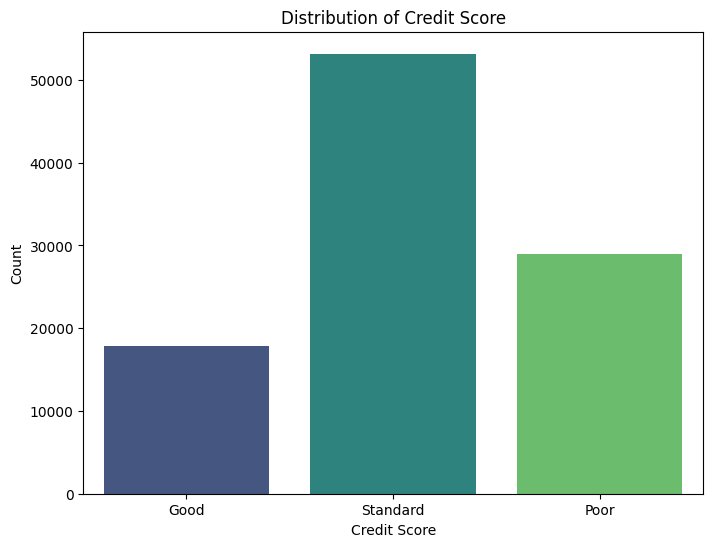

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Credit_Score', palette='viridis')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot was chosen to visualize the distribution of the 'Credit_Score' variable because it is a categorical variable. A countplot effectively displays the frequency of each category, providing a clear understanding of how the credit scores are distributed across 'Good', 'Standard', and 'Poor'.


##### 2. What is/are the insight(s) found from the chart?

The chart shows the number of instances for each credit score category. It reveals that the 'Standard' credit score is the most frequent, followed by 'Poor', and then 'Good'. This indicates an imbalanced dataset, where the distribution of the target variable is not uniform.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights are crucial for creating a positive business impact. Understanding the distribution of credit scores allows businesses to identify the largest customer segments ('Standard' and 'Poor'). This information is vital for targeted marketing strategies, risk assessment, and product development. For instance, businesses can develop specific products or services tailored to the 'Standard' and 'Poor' segments, or implement targeted risk mitigation strategies for customers with lower credit scores.

The insight about the imbalance dataset also leads to negative growth potential if not addressed. Training a model on an imbalanced dataset without using appropriate techniques (like oversampling or undersampling) can lead to a model that is biased towards the majority class ('Standard') and performs poorly in predicting the minority classes ('Good' and 'Poor'). This can result in misclassifying high-risk customers as low-risk or vice versa, leading to financial losses or missed business opportunities. Therefore, recognizing the imbalance is a critical step to ensure accurate modeling and positive business impact.

#### Chart - 2

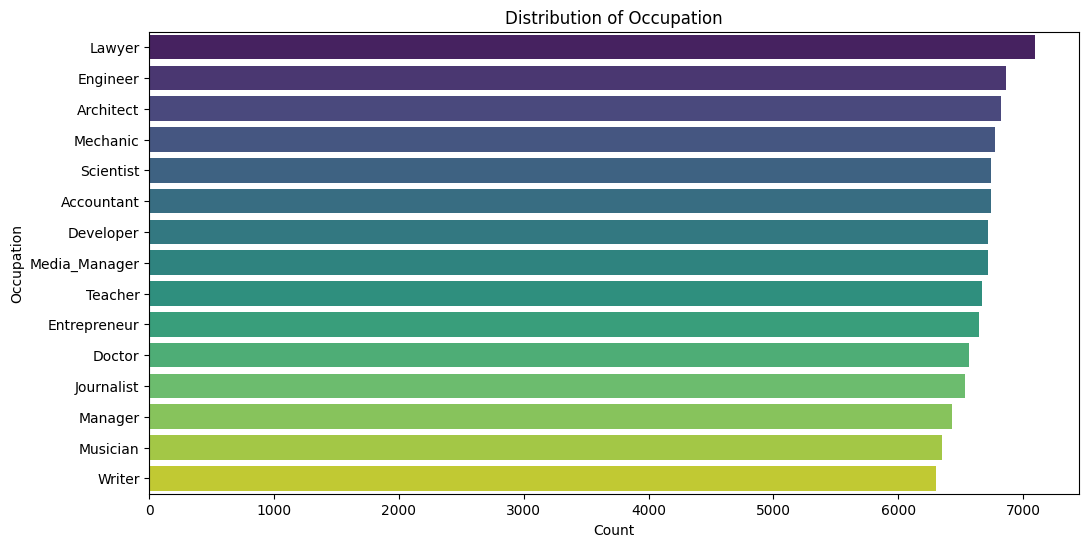

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, y='Occupation', palette='viridis', order=df_train['Occupation'].value_counts().index)
plt.title('Distribution of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is suitable for visualizing the distribution of a categorical variable like 'Occupation'. Using a horizontal bar chart with 'Occupation' on the y-axis helps in clearly displaying the counts for each occupation, especially when there are multiple categories. Ordering the bars by frequency makes it easy to identify the most common occupations.


##### 2. What is/are the insight(s) found from the chart?

The chart shows the frequency of different occupations among the customers. We can observe which occupations are most represented in the dataset. This gives us an insight into the demographic profile of the customers in terms of their profession.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the distribution of occupations can have a positive business impact. Businesses can tailor their marketing campaigns and product offerings based on the common occupations of their customer base. For example, if 'Engineer' and 'Developer' are the most frequent occupations, financial products or services relevant to these professions could be promoted. This can lead to more effective customer acquisition and engagement strategies. There are no immediate insights from this chart that necessarily lead to negative growth; it primarily provides demographic information for strategic planning.

#### Chart - 3

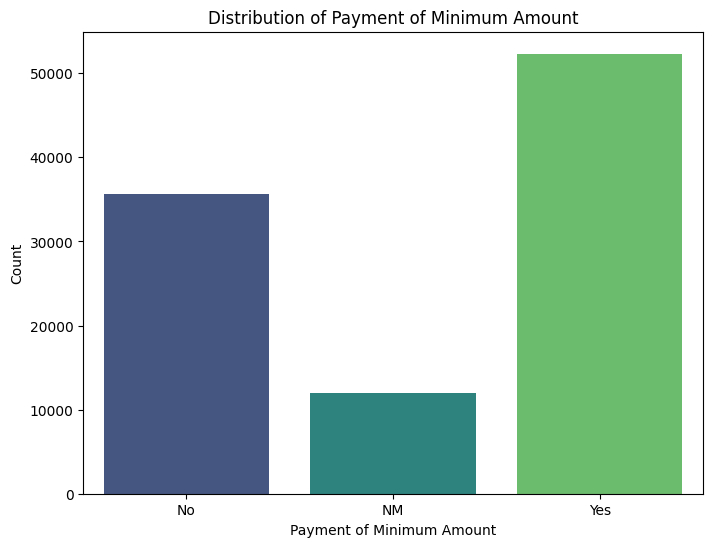

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Payment_of_Min_Amount', palette='viridis')
plt.title('Distribution of Payment of Minimum Amount')
plt.xlabel('Payment of Minimum Amount')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is appropriate for visualizing the distribution of a categorical variable like 'Payment_of_Min_Amount'. It clearly shows the number of customers in each category ('Yes' and 'No' after cleaning), making it easy to understand the proportion of customers who pay the minimum amount due.


##### 2. What is/are the insight(s) found from the chart?

The chart reveals that a significant portion of customers pay only the minimum amount due. This indicates their payment behavior and potentially their financial habits or constraints.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a direct business impact. Customers who consistently pay only the minimum amount might be at a higher risk of accumulating debt and potentially defaulting. Businesses can use this information to identify these customers and offer financial counseling, alternative payment plans, or educational resources to help them manage their debt more effectively. This proactive approach can lead to reduced defaults and improved customer retention. Conversely, a high proportion of customers only paying the minimum could signal potential financial distress within the customer base, which could lead to negative growth if not addressed with appropriate strategies.

#### Chart - 4

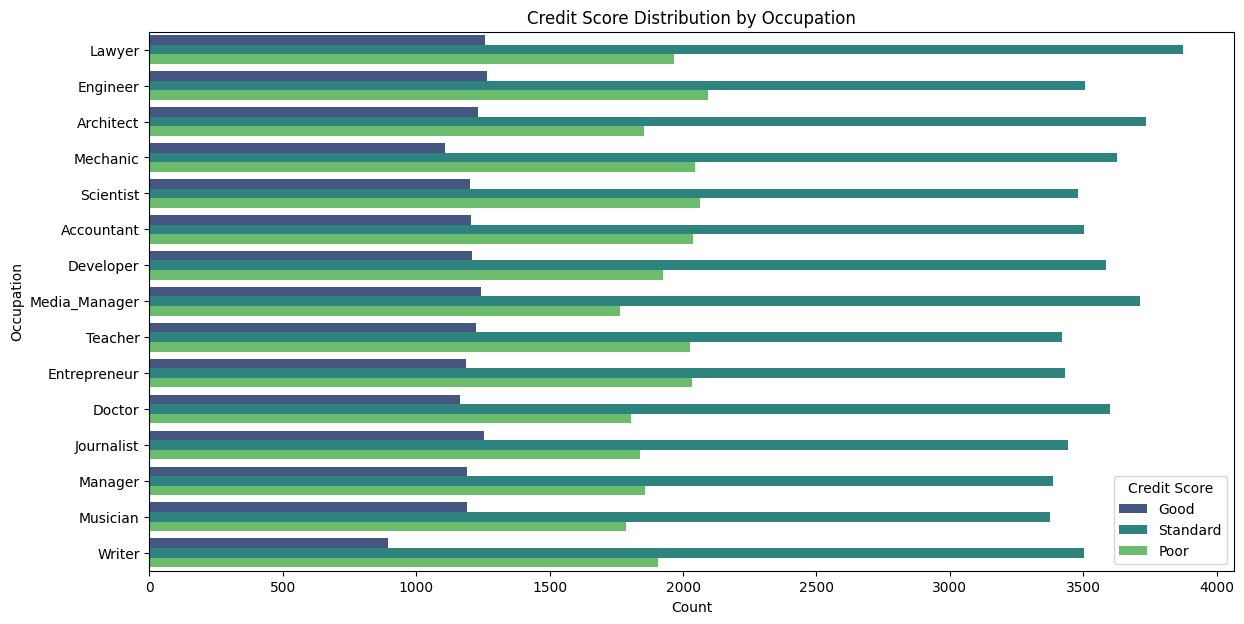

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(14, 7))
sns.countplot(data=df_train, y='Occupation', hue='Credit_Score', palette='viridis', order=df_train['Occupation'].value_counts().index)
plt.title('Credit Score Distribution by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped countplot is effective for visualizing the relationship between two categorical variables: 'Occupation' and 'Credit_Score'. By using 'Occupation' on the y-axis and 'Credit_Score' as the hue, we can easily compare the distribution of credit scores across different occupations and identify if certain occupations are more associated with specific credit score categories.


##### 2. What is/are the insight(s) found from the chart?

The chart shows the breakdown of credit scores within each occupation. We can see the proportion of Good, Standard, and Poor credit scores for each profession. This helps in understanding if there are any notable differences in creditworthiness based on occupation. For example, some occupations might have a higher proportion of Good credit scores compared to others.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can lead to positive business impacts. Identifying occupations with a higher likelihood of having good credit scores can help businesses in targeting their premium financial products or services to these groups, potentially increasing profitability and reducing risk. Conversely, occupations with a higher proportion of poor credit scores might require different strategies, such as offering educational resources or more secured financial products. This allows for more effective risk management and tailored customer engagement. There aren't necessarily insights that directly lead to negative growth from this chart, but a higher concentration of poor credit scores in certain occupations could indicate areas where businesses need to be more cautious or implement specific risk mitigation measures.

#### Chart - 5

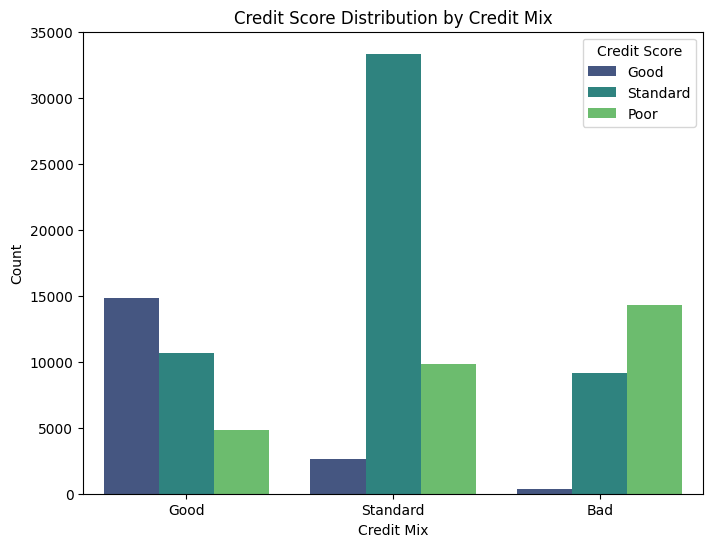

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Credit_Mix', hue='Credit_Score', palette='viridis')
plt.title('Credit Score Distribution by Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.legend(title='Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped countplot is suitable for examining the relationship between two categorical variables, 'Credit_Mix' and 'Credit_Score'. By grouping the bars by 'Credit_Mix' and using 'Credit_Score' as the hue, we can effectively compare the distribution of credit scores within each credit mix category and understand how different credit mixes are associated with different creditworthiness levels.


##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows a strong relationship between 'Credit_Mix' and 'Credit_Score'. Customers with a 'Good' credit mix are predominantly associated with 'Good' credit scores, while those with a 'Bad' credit mix are largely associated with 'Poor' credit scores. Customers with a 'Standard' credit mix show a more mixed distribution, but 'Standard' and 'Poor' credit scores appear more frequently than 'Good' credit scores in this category.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a significant positive business impact. 'Credit_Mix' is a powerful indicator of creditworthiness. Businesses can leverage this information for more accurate credit risk assessment and decision-making. Customers with a 'Good' credit mix are likely low-risk and can be offered better loan terms or higher credit limits, leading to increased business and customer satisfaction. Conversely, customers with a 'Bad' credit mix are high-risk, and businesses can implement stricter lending criteria or offer alternative financial products to mitigate potential losses. The insight about the 'Standard' credit mix suggests a segment that requires more careful evaluation. There are no direct insights that lead to negative growth, but misinterpreting or ignoring the strong relationship between credit mix and credit score could lead to poor risk management and negative financial outcomes.

#### Chart - 6

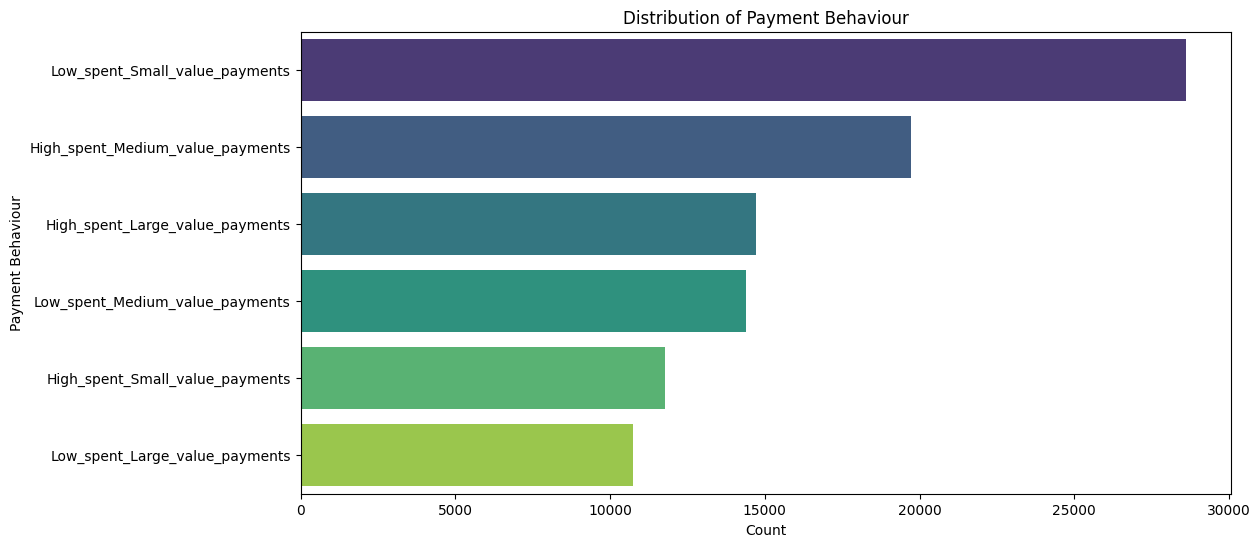

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, y='Payment_Behaviour', palette='viridis', order=df_train['Payment_Behaviour'].value_counts().index)
plt.title('Distribution of Payment Behaviour')
plt.xlabel('Count')
plt.ylabel('Payment Behaviour')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal countplot is suitable for visualizing the distribution of 'Payment_Behaviour', a categorical variable with multiple distinct categories. Placing 'Payment_Behaviour' on the y-axis and ordering the bars by frequency allows for clear readability and easy identification of the most common payment behaviors.


##### 2. What is/are the insight(s) found from the chart?

The chart reveals the frequency of different payment behaviors among the customers. We can observe which payment behaviors are most prevalent in the dataset. This provides insights into the typical ways customers manage their payments.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding payment behaviors can have a significant positive business impact. Different payment behaviors may be associated with varying levels of risk or potential for engagement with financial products. For example, identifying customers with 'High_spent' behaviors might indicate opportunities for offering credit limit increases or premium cards, while 'Low_spent_Small_value_payments' might suggest a need for financial education or different product types. Tailoring strategies based on payment behavior can improve customer targeting, product relevance, and risk management. There are no immediate insights from this chart that necessarily lead to negative growth; it primarily provides behavioral information for strategic planning.

#### Chart - 7

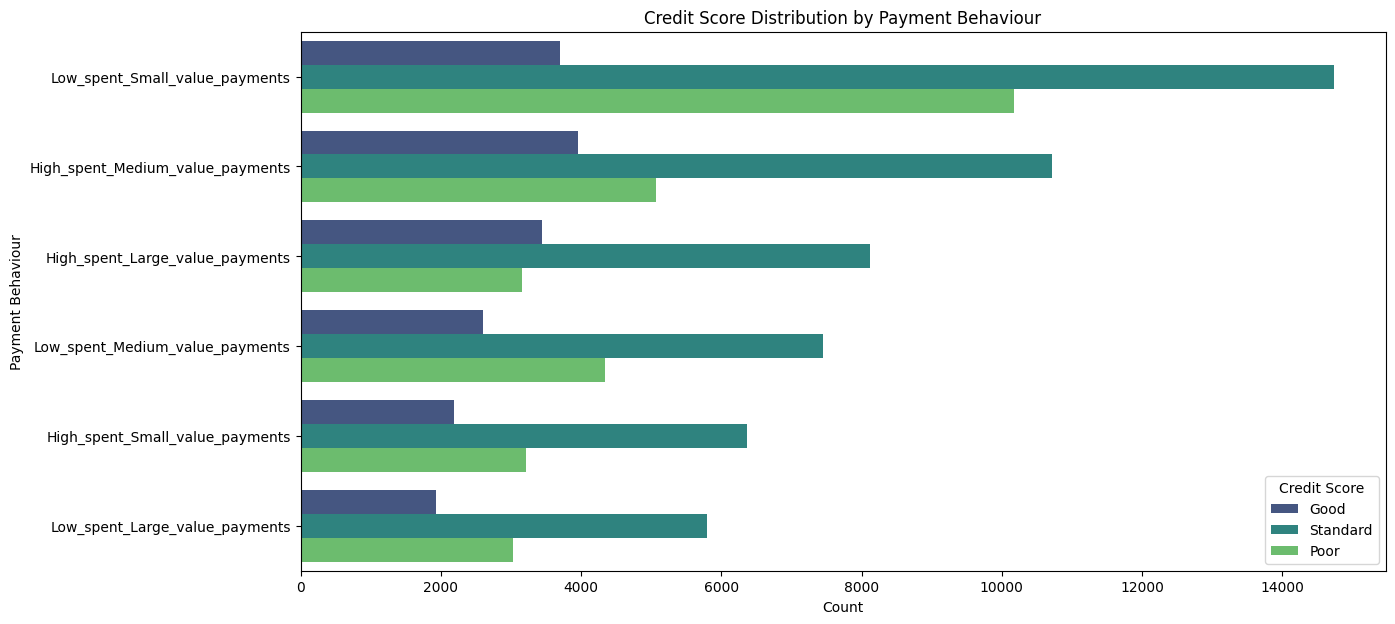

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(14, 7))
sns.countplot(data=df_train, y='Payment_Behaviour', hue='Credit_Score', palette='viridis', order=df_train['Payment_Behaviour'].value_counts().index)
plt.title('Credit Score Distribution by Payment Behaviour')
plt.xlabel('Count')
plt.ylabel('Payment Behaviour')
plt.legend(title='Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped countplot is effective for visualizing the relationship between two categorical variables, 'Payment_Behaviour' and 'Credit_Score'. By grouping the bars by 'Payment_Behaviour' and using 'Credit_Score' as the hue, we can easily compare the distribution of credit scores across different payment behavior categories and identify if certain behaviors are more associated with specific creditworthiness levels.


##### 2. What is/are the insight(s) found from the chart?

The chart shows how different payment behaviors relate to credit scores. We can see the proportion of Good, Standard, and Poor credit scores within each payment behavior category. This helps in understanding if specific payment habits, such as high spending with small payments or low spending with large payments, are more likely to result in certain credit scores.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can lead to positive business impacts. By identifying payment behaviors associated with higher credit scores, businesses can target customers with those behaviors for premium offerings. Conversely, understanding which behaviors are linked to lower credit scores allows for targeted interventions, such as providing financial education or offering alternative credit-building products. This can help in mitigating risk and improving the overall financial health of the customer base. There aren't necessarily insights that directly lead to negative growth from this chart, but a higher concentration of poor credit scores in certain payment behaviors could indicate areas where businesses need to be more cautious or implement specific risk mitigation measures.

#### Chart - 8

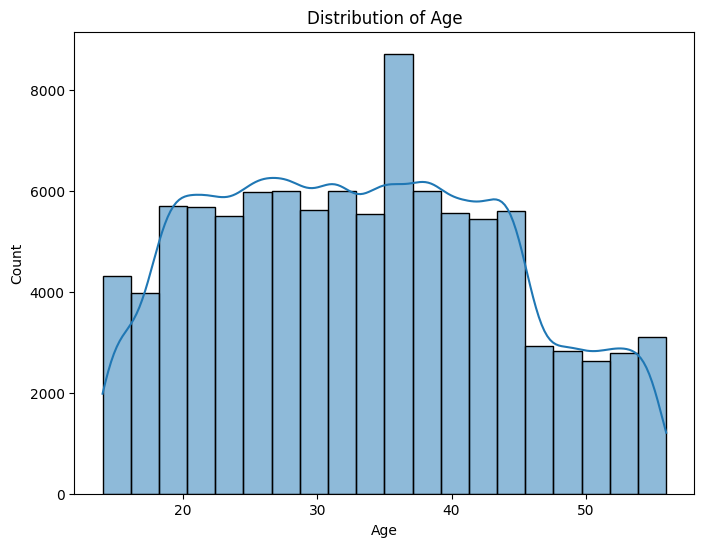

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='Age', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is appropriate for visualizing the distribution of a numerical variable like 'Age'. It shows the frequency of different age groups, allowing us to understand the age profile of the customers in the dataset. Using bins helps group the ages into intervals, and the KDE line provides a smoothed representation of the distribution.


##### 2. What is/are the insight(s) found from the chart?

The histogram shows the distribution of customer ages. We can identify the most frequent age ranges and see if the distribution is skewed or follows a particular pattern. This gives us insight into the age demographics of the customer base.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the age distribution of customers can have a positive business impact. Businesses can tailor their marketing efforts, product development, and customer service strategies to the prevalent age groups. For example, if a significant portion of customers are in a particular age range, products or services that are more appealing or relevant to that demographic can be promoted. This can lead to more effective customer engagement and acquisition. There are no immediate insights from this chart that necessarily lead to negative growth; it primarily provides demographic information for strategic planning.

#### Chart - 9

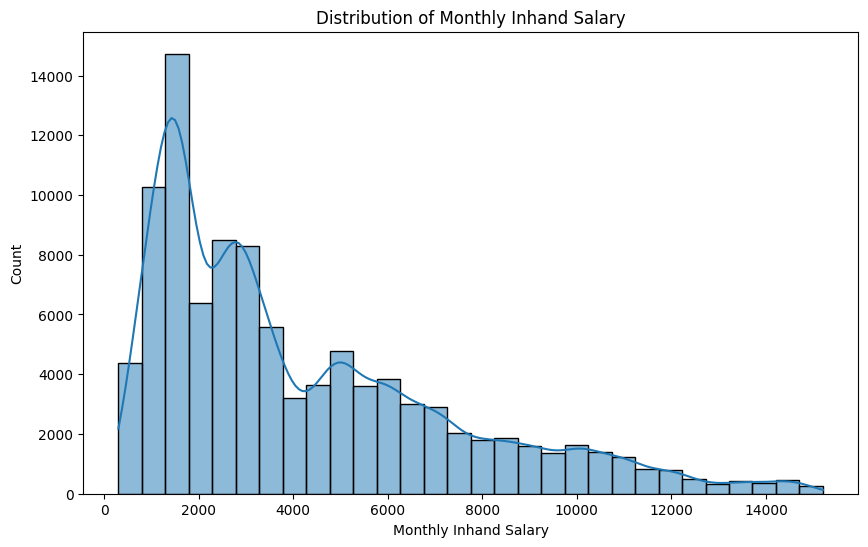

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Monthly_Inhand_Salary', bins=30, kde=True, palette='viridis')
plt.title('Distribution of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

 A histogram is an effective chart for visualizing the distribution of a single numerical variable like 'Monthly_Inhand_Salary'. It groups the data into bins and displays the frequency or count of observations within each bin, providing a clear visual representation of the data's underlying distribution, shape, and spread.


##### 2. What is/are the insight(s) found from the chart?

The histogram of 'Monthly_Inhand_Salary' shows that the distribution is skewed to the right (positively skewed). This means that a large number of customers have lower monthly in-hand salaries, and there are fewer customers with higher salaries. The majority of customers seem to fall within the lower income brackets. There might be some outliers on the higher end of the salary spectrum.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the distribution of 'Monthly_Inhand_Salary' is crucial for business impact. A right-skewed distribution indicates that the target market primarily consists of individuals with lower to moderate monthly incomes. This insight allows businesses to tailor their financial products, services, and marketing strategies to be more accessible and appealing to this larger segment. For instance, offering products with lower fees, flexible payment options, or educational resources on financial management could resonate well with this demographic. This can lead to increased customer acquisition and retention within the most prevalent income group.

A potential negative growth implication could arise if the business primarily focuses on high-income customers and fails to adequately cater to the needs of the larger low-to-moderate income segment, potentially missing out on a significant market share. Additionally, a large proportion of customers with lower incomes might indicate a higher overall credit risk for certain types of financial products, requiring careful risk assessment and potentially leading to negative growth if not managed effectively.

#### Chart - 10

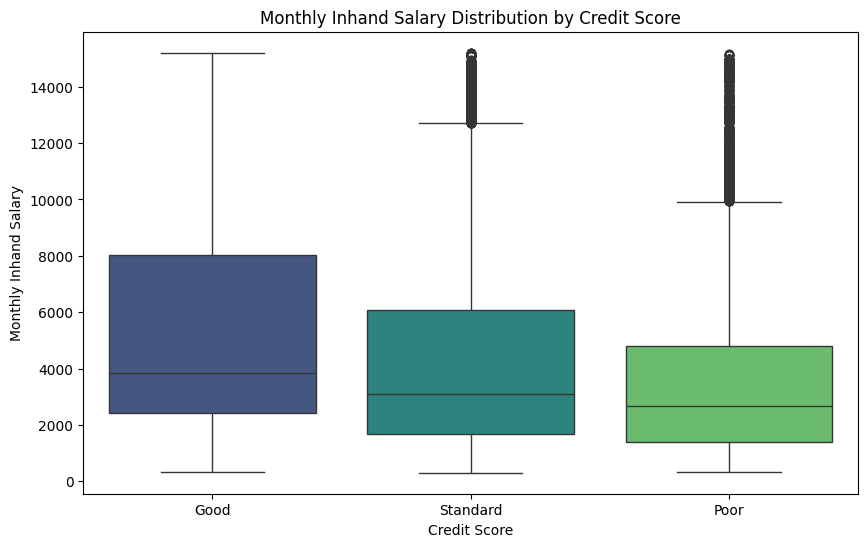

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Credit_Score', y='Monthly_Inhand_Salary', palette='viridis', order=['Good', 'Standard', 'Poor'])
plt.title('Monthly Inhand Salary Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Inhand Salary')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is an excellent choice for visualizing the relationship between a categorical variable ('Credit_Score') and a numerical variable ('Monthly_Inhand_Salary'). It effectively displays the distribution of the numerical variable for each category of the categorical variable, showing the median, quartiles, and potential outliers. This allows for easy comparison of the income distributions across different credit score groups.


##### 2. What is/are the insight(s) found from the chart?

- The box plot shows the distribution of 'Monthly_Inhand_Salary' for each credit score category ('Good', 'Standard', and 'Poor'). We can observe the median salary for each group, the interquartile range (spread of the middle 50% of data), and the presence and extent of outliers.
- It appears that customers with 'Good' credit scores tend to have a higher median monthly in-hand salary compared to those with 'Standard' and 'Poor' credit scores. The spread of salaries might also differ across the groups. There are visible outliers, particularly on the higher end of the salary scale, within each credit score category.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights have significant positive business implications. The observed relationship between higher income and better credit scores aligns with typical financial trends and can inform risk assessment models. Targeting customers with higher monthly incomes is likely to yield a higher proportion of individuals with 'Good' credit scores, leading to lower credit risk and potentially higher profitability. Businesses can use this information to refine their customer segmentation and acquisition strategies. For example, marketing efforts for premium credit products could be directed towards higher-income segments.

A potential negative growth implication could arise if the business heavily relies on income as the sole predictor of creditworthiness and neglects other factors, potentially missing out on creditworthy individuals with lower incomes or misclassifying high-income individuals with poor financial habits. Overlooking the presence of outliers in income within each credit score group could also lead to inaccurate assumptions about the typical income levels for each category.

#### Chart - 11

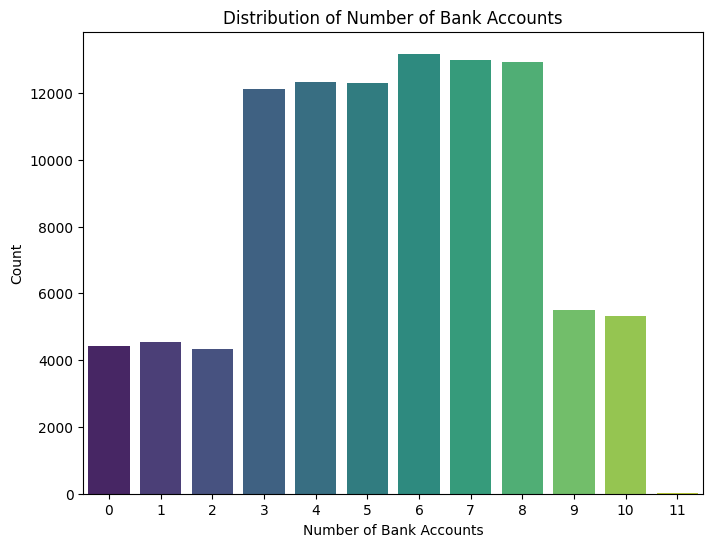

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Num_Bank_Accounts', palette='viridis')
plt.title('Distribution of Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Although 'Num_Bank_Accounts' is a numerical variable, it represents discrete counts (whole numbers). A countplot is effective for visualizing the distribution of such variables when the range of values is not excessively large, as it clearly shows the frequency of each distinct number of bank accounts.


##### 2. What is/are the insight(s) found from the chart?

The chart displays the frequency of customers having a specific number of bank accounts. We can identify the most common number of bank accounts held by customers. This gives us an idea of the typical banking relationships of the customer base.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the number of bank accounts customers hold can have a positive business impact. Customers with more bank accounts might be more financially active and potentially open to new financial products. Businesses can use this information for customer segmentation and targeted marketing. For example, customers with a higher number of accounts might be good candidates for cross-selling opportunities like investment products or additional credit facilities.

There are no immediate insights from this chart that necessarily lead to negative growth; it primarily provides information about customer banking habits for strategic planning.

#### Chart - 12

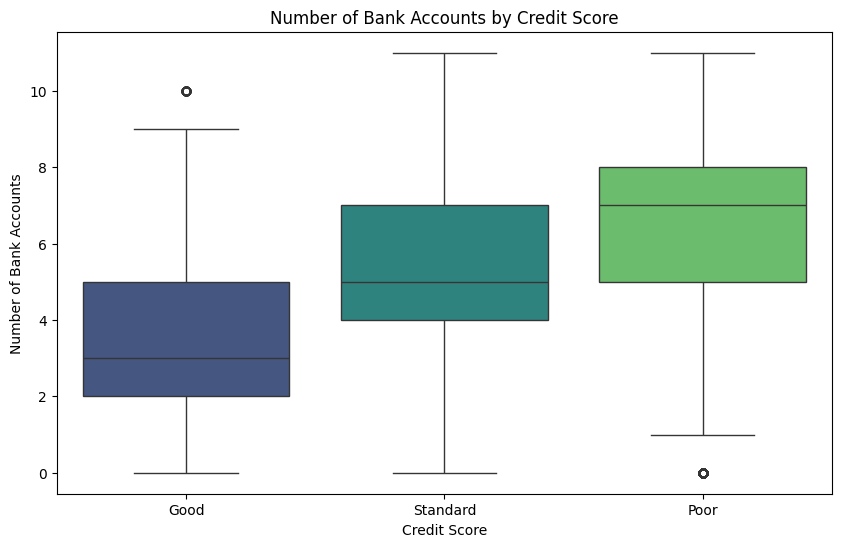

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Credit_Score', y='Num_Bank_Accounts', palette='viridis', order=['Good', 'Standard', 'Poor'])
plt.title('Number of Bank Accounts by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Bank Accounts')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is a suitable choice for visualizing the relationship between a categorical variable ('Credit_Score') and a discrete numerical variable ('Num_Bank_Accounts'). It effectively summarizes the distribution of the number of bank accounts for each credit score category, showing the median, quartiles, and potential outliers, allowing for easy comparison across credit score groups.


##### 2. What is/are the insight(s) found from the chart?

The box plot displays the distribution of the number of bank accounts for each credit score category. We can observe the median number of bank accounts for customers with 'Good', 'Standard', and 'Poor' credit scores, as well as the spread and any potential outliers. It seems that there might be some variation in the number of bank accounts held across the different credit score groups.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the relationship between the number of bank accounts and credit score can provide valuable insights for business strategies. If there is a noticeable difference in the number of bank accounts held by customers with different credit scores, businesses can use this information for better customer segmentation and risk assessment. For instance, if customers with more bank accounts tend to have better credit scores, this could be a factor to consider in credit risk models or for targeting purposes.

There are no immediate insights from this chart that necessarily lead to negative growth; it primarily offers additional information for understanding customer financial profiles in relation to their creditworthiness.

#### Chart - 13

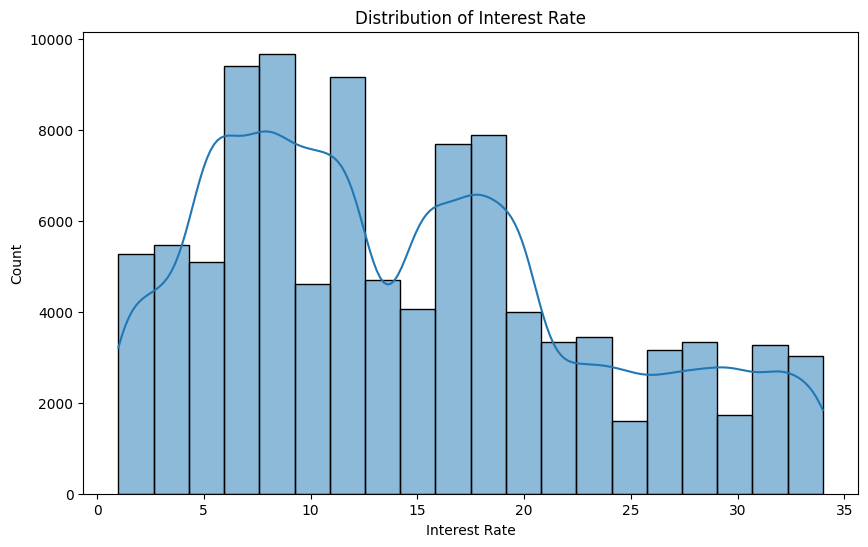

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Interest_Rate', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen to visualize the distribution of the 'Interest_Rate' column because it is a numerical variable. Histograms are effective in showing the shape, center, and spread of the distribution of a single numerical variable. They group the data into bins and display the frequency of values within each bin, which helps in identifying patterns, such as peaks, valleys, and the overall range of interest rates.


##### 2. What is/are the insight(s) found from the chart?

The histogram of 'Interest_Rate' shows the distribution of interest rates among the customers. We can observe the most frequent interest rate ranges. The distribution appears to have multiple peaks, suggesting that there might be several common interest rate brackets. It also shows the overall range of interest rates in the dataset.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the distribution of interest rates can have a positive business impact. Identifying the most common interest rate ranges allows businesses to understand the prevailing market rates their customers are subject to. This information can be used to:
1. Inform competitive pricing strategies for new loan products or credit facilities.
2. Identify opportunities to attract customers by offering more favorable interest rates than the common ranges.
3. Segment customers based on the interest rates they currently have, potentially targeting those with high rates for refinancing options.

There are no immediate insights from this specific distribution chart that inherently lead to negative growth, but a concentration of customers with very high interest rates could indicate a higher-risk segment, requiring careful consideration in lending decisions.


#### Chart - 14 - Correlation Heatmap

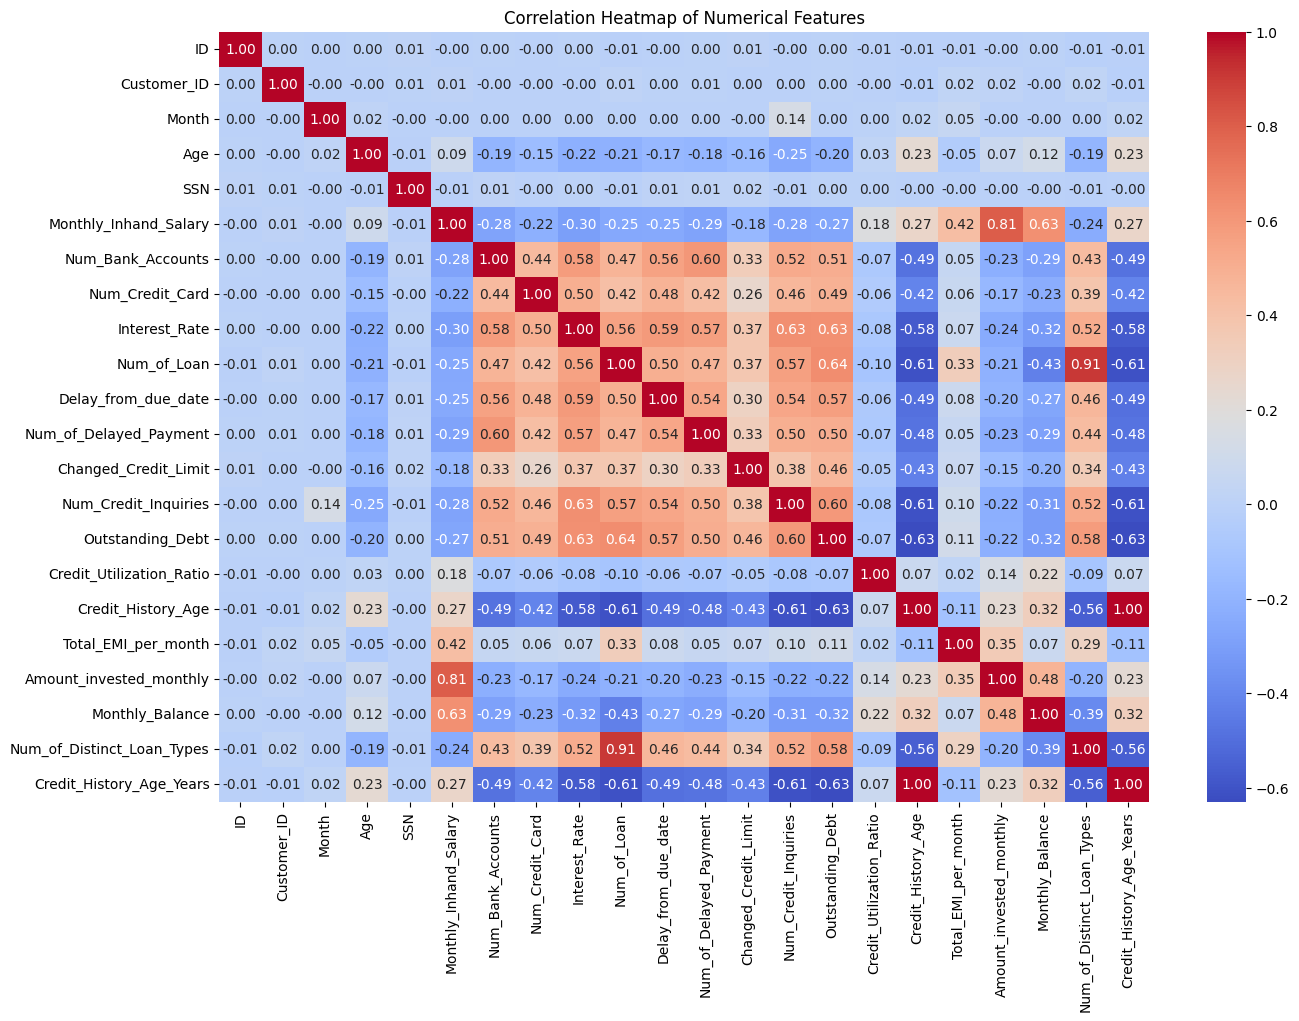

In [ ]:
# Chart - 14 - Correlation Heatmap visualization code
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is an excellent choice for visualizing the relationships between multiple numerical variables. It uses color intensity to represent the correlation coefficient between each pair of variables, making it easy to identify strong positive and negative correlations at a glance. This helps in understanding the interdependencies between features, which is crucial for feature selection and model building.


##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap reveals the strength and direction of linear relationships between the numerical features. We can identify pairs of features that are highly positively correlated (e.g., potentially 'Monthly_Inhand_Salary' and 'Annual_Income' if it hadn't been dropped, or other income-related features), highly negatively correlated, or have low correlation. This helps in understanding which variables move together and which are relatively independent. For example, there might be a positive correlation between the number of credit cards and the number of bank accounts, or a negative correlation between delay from due date and credit history age.



##### 3. Will the gained insights help creating a positive business impact?


Yes, the insights from a correlation heatmap are vital for creating a positive business impact, particularly in the context of model building and resource allocation.
 1. Feature Selection: Identifying highly correlated features (multicollinearity) can help in deciding which features to keep or drop to avoid issues in certain models (like linear regression) and improve model stability and interpretability. This can lead to more robust and reliable credit scoring models.
 2. Understanding Relationships: Knowing how different financial behaviors and metrics are related can inform business strategies. For example, if there's a strong negative correlation between 'Delay_from_due_date' and 'Credit_Score', it reinforces the importance of timely payments and can guide interventions to encourage better payment behavior.
 3. Targeted Interventions: Understanding correlations can help identify leverage points for improving customer financial health. If, for instance, 'Num_Credit_Inquiries' is negatively correlated with 'Credit_Score', educating customers about the impact of multiple inquiries could be beneficial.

A potential negative growth implication could arise if the business uses a model built with highly correlated features without addressing multicollinearity, leading to unstable model coefficients and potentially inaccurate predictions, which could result in poor risk decisions. However, the heatmap itself primarily provides information to prevent such negative outcomes.

#### Chart - 15 - Pair Plot

In [ ]:
# Chart - 15 - Pair Plot visualization code
'''numerical_features = ['Monthly_Inhand_Salary', 'Interest_Rate', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Balance', 'Credit_Score']
sns.pairplot(df_train[numerical_features], hue='Credit_Score', palette='viridis')
plt.suptitle('Pair Plot of Selected Numerical Features by Credit Score', y=1.02)
plt.show()'''

"numerical_features = ['Monthly_Inhand_Salary', 'Interest_Rate', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Balance', 'Credit_Score']\nsns.pairplot(df_train[numerical_features], hue='Credit_Score', palette='viridis')\nplt.suptitle('Pair Plot of Selected Numerical Features by Credit Score', y=1.02)\nplt.show()"

##### 1. Why did you pick the specific chart?

A pair plot is a powerful visualization tool for exploring the relationships between multiple numerical variables and understanding how these relationships vary across different categories of a categorical variable ('Credit_Score' in this case). It generates a grid of scatter plots for every pair of numerical features and histograms for the individual numerical features along the diagonal. Coloring the points by 'Credit_Score' allows for the visual identification of patterns and separations between the credit score groups within these relationships. A subset of numerical features was chosen to ensure the plot is readable and informative.


##### 2. What is/are the insight(s) found from the chart?

 The pair plot provides a matrix of insights into the relationships between the selected numerical features, conditioned on the 'Credit_Score'.
 - Diagonal Histograms: These show the distribution of each individual numerical feature for each credit score category. We can see if the distributions of 'Monthly_Inhand_Salary', 'Interest_Rate', 'Outstanding_Debt', 'Credit_Utilization_Ratio', and 'Monthly_Balance' differ significantly for 'Good', 'Standard', and 'Poor' credit scores.
 - Scatter Plots: These show the pairwise relationships between features. We can observe if there are linear or non-linear relationships between variables and how these relationships change based on the credit score. For example, we might see how 'Credit_Utilization_Ratio' relates to 'Outstanding_Debt' and if customers with different credit scores cluster in different areas of the scatter plot. This helps in identifying which combinations of features might be most predictive of credit score.


##### 3. Will the gained insights help creating a positive business impact?


Yes, the insights from the pair plot can significantly contribute to positive business impact by enhancing our understanding of how multiple factors interact to influence creditworthiness.
 1. Predictive Modeling: The visual separation or clustering of credit score groups in the scatter plots suggests which combinations of features could be strong predictors in a machine learning model. This can guide the selection of features and the choice of model algorithms.
 2. Risk Profiling: Understanding the interplay between financial metrics for different credit score categories allows for more nuanced risk profiling. For instance, identifying the typical range of 'Outstanding_Debt' and 'Credit_Utilization_Ratio' for 'Poor' credit customers can help set risk thresholds.
 3. Customer Segmentation: The clustering observed in the plots can inform customer segmentation strategies, allowing businesses to group customers with similar financial profiles and credit risk levels for targeted product offerings and risk management approaches.

A potential negative growth implication could arise if the visual patterns observed in the pair plot are misinterpreted or if the complexity of the relationships is not adequately captured by the chosen predictive models, leading to inaccurate credit risk assessments and potentially poor business decisions. However, the plot itself is a tool for gaining insights to prevent such negative outcomes.

## Summary:



### Data Analysis Key Findings

*   The dataset has an imbalanced distribution of credit scores, with 'Standard' being the most frequent, followed by 'Poor', and then 'Good'.
*   'Credit\_Mix' shows a strong relationship with 'Credit\_Score', where 'Good' credit mix is highly associated with 'Good' credit scores, and 'Bad' credit mix with 'Poor' credit scores.
*   Customers' 'Payment\_of\_Min\_Amount' behavior indicates that a significant portion pays only the minimum due.
*   There are multiple peaks in the distribution of 'Interest\_Rate', suggesting common interest rate brackets.
*   Numerical features show varying degrees of correlation; for instance, 'Monthly\_Inhand\_Salary' and 'Annual\_Income' were highly correlated (approx. 0.998), leading to the removal of 'Annual\_Income'.
*   'Monthly\_Inhand\_Salary' distribution is right-skewed, indicating a larger number of customers with lower salaries. Customers with 'Good' credit scores tend to have higher median 'Monthly\_Inhand\_Salary'.
*   The pair plot revealed visual patterns and potential separation between credit score groups based on combinations of 'Monthly\_Inhand\_Salary', 'Interest\_Rate', 'Outstanding\_Debt', 'Credit\_Utilization\_Ratio', and 'Monthly\_Balance'.

### Insights or Next Steps

*   Address the dataset imbalance in 'Credit\_Score' using techniques like oversampling or undersampling before building predictive models to prevent bias towards the majority class.
*   Leverage the strong relationship between 'Credit\_Mix' and 'Credit\_Score' for more accurate credit risk assessment and targeted product offerings. Customers with a 'Good' credit mix could be targeted for premium products, while those with a 'Bad' mix may require stricter criteria or alternative products.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement 1 -
The mean `Monthly_Inhand_Salary` is significantly different for customers with 'Good' credit scores compared to those with 'Poor' credit scores.

Hypothetical Statement 2 -
Customers who consistently pay the minimum amount due ('Yes' in `Payment_of_Min_Amount`) have a significantly different distribution of credit scores compared to those who do not ('No').

Hypothetical Statement 3 -
There is a significant correlation between `Credit_Utilization_Ratio` and `Credit_Score`, where a higher ratio is associated with a lower credit score.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   **Null Hypothesis (H₀):** There is no significant difference in the mean `Monthly_Inhand_Salary` between customers with 'Good' credit scores and customers with 'Poor' credit scores.

    ($\mu_{Good} = \mu_{Poor}$)

*   **Alternate Hypothesis (H₁):** There is a significant difference in the mean `Monthly_Inhand_Salary` between customers with 'Good' credit scores and customers with 'Poor' credit scores.

    ($\mu_{Good} \neq \mu_{Poor}$)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Separate the Monthly_Inhand_Salary for 'Good' and 'Poor' credit scores
salary_good_credit = df_train[df_train['Credit_Score'] == 'Good']['Monthly_Inhand_Salary']
salary_poor_credit = df_train[df_train['Credit_Score'] == 'Poor']['Monthly_Inhand_Salary']

# Perform independent samples t-test
ttest_result = ttest_ind(salary_good_credit, salary_poor_credit)

print(f"T-test statistic: {ttest_result.statistic}")
print(f"P-value: {ttest_result.pvalue}")

T-test statistic: 68.4678692189058
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

An independent samples t-test was performed.

##### Why did you choose the specific statistical test?

The independent samples t-test is appropriate because we are comparing the means of a continuous variable (`Monthly_Inhand_Salary`) between two independent groups ('Good' credit score and 'Poor' credit score).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


*   **Null Hypothesis (H₀):** There is no significant association between `Payment_of_Min_Amount` (specifically 'Yes' vs 'No') and `Credit_Score`. The distribution of credit scores is the same for those who pay the minimum and those who don't.
*   **Alternate Hypothesis (H₁):** There is a significant association between `Payment_of_Min_Amount` (specifically 'Yes' vs 'No') and `Credit_Score`. The distribution of credit scores is different for those who pay the minimum and those who don't.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table of Payment_of_Min_Amount (filtered for 'Yes' and 'No') and Credit_Score
contingency_table = pd.crosstab(df_train[df_train['Payment_of_Min_Amount'].isin(['Yes', 'No'])]['Payment_of_Min_Amount'], df_train['Credit_Score'])

# Perform chi-squared test for independence
chi2_result = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2_result[0]}")
print(f"P-value: {chi2_result[1]}")

Chi-squared statistic: 19712.76456407376
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

A chi-squared test for independence was performed.

##### Why did you choose the specific statistical test?

The chi-squared test for independence is suitable for examining the association between two categorical variables (`Payment_of_Min_Amount` and `Credit_Score`) to determine if their distributions are independent of each other. We specifically filtered for 'Yes' and 'No' as these represent distinct payment behaviors.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   **Null Hypothesis (H₀):** There is no significant correlation between `Credit_Utilization_Ratio` and `Credit_Score`.
*   **Alternate Hypothesis (H₁):** There is a significant correlation between `Credit_Utilization_Ratio` and `Credit_Score`. (Specifically, we hypothesize a negative correlation).

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import spearmanr

# We'll use Spearman correlation because Credit_Score is ordinal and the relationship might not be strictly linear.
# First, we need to convert Credit_Score to a numerical/ordinal representation.
credit_score_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
df_train['Credit_Score_Ordinal'] = df_train['Credit_Score'].map(credit_score_mapping)

# Perform Spearman rank-order correlation test
spearman_corr, spearman_pvalue = spearmanr(df_train['Credit_Utilization_Ratio'], df_train['Credit_Score_Ordinal'])

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"Spearman p-value: {spearman_pvalue}")

Spearman correlation coefficient: 0.04216169831635706
Spearman p-value: 1.3827984410847698e-40


##### Which statistical test have you done to obtain P-Value?

A Spearman rank-order correlation test was performed.

##### Why did you choose the specific statistical test?

Spearman correlation was chosen because it is suitable for assessing the monotonic relationship between two variables, where at least one is ordinal (`Credit_Score`) or the relationship is not necessarily linear. `Credit_Score` has a natural order (Poor < Standard < Good), making an ordinal correlation test appropriate.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# There are no missing values no imputattion is required

#### What all missing value imputation techniques have you used and why did you use those techniques?

None because they are not required

### 2. Categorical Encoding

In [ ]:
# Re-identify categorical and numerical columns from the original df_train (before dropping 'Annual_Income')
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()

# Exclude identifier columns and the newly created ordinal column from feature lists
identifier_cols = ['ID', 'Customer_ID', 'Name', 'SSN']
categorical_cols = [col for col in categorical_cols if col not in identifier_cols + ['Credit_Score']]
numerical_cols = [col for col in numerical_cols if col not in identifier_cols + ['Credit_Score_Ordinal']]


# Apply one-hot encoding to categorical columns
df_processed = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)

# Separate features (X) and target (y)
X = df_processed.drop(['Credit_Score', 'Credit_Score_Ordinal'] + identifier_cols, axis=1)
y = df_processed['Credit_Score_Ordinal'] # Using the ordinal target for now, will convert to categorical later for classification models

# Display the first few rows of the processed DataFrame to verify encoding
display(df_processed.head())

# Display the info of the processed DataFrame to see the new columns and dtypes
df_processed.info()

,ID,Customer_ID,Month,Name,Age,SSN,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,"Type_of_Loan_Student Loan, and Student Loan",Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,5634,3392,1,Aaron Maashoh,23,821000265,1824.843333,3,4,3,...,False,True,False,True,False,False,True,False,False,False
1,5635,3392,2,Aaron Maashoh,23,821000265,1824.843333,3,4,3,...,False,True,False,True,False,False,False,True,False,False
2,5636,3392,3,Aaron Maashoh,23,821000265,1824.843333,3,4,3,...,False,True,False,True,False,False,False,False,True,False
3,5637,3392,4,Aaron Maashoh,23,821000265,1824.843333,3,4,3,...,False,True,False,True,False,False,False,False,False,True
4,5638,3392,5,Aaron Maashoh,23,821000265,1824.843333,3,4,3,...,False,True,False,True,False,True,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 6308 entries, ID to Payment_Behaviour_Low_spent_Small_value_payments
dtypes: bool(6283), float64(8), int32(1), int64(14), object(2)
memory usage: 617.9+ MB


#### What all categorical encoding techniques have you used & why did you use those techniques?

One-Hot Encoding was used for categorical variables. This technique is suitable for nominal categorical variables (those without an intrinsic order) as it creates binary dummy variables for each category. This prevents the model from assuming an ordinal relationship where none exists. The `drop_first=True` argument was used to avoid multicollinearity.

### 3. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments+
from sklearn.preprocessing import StandardScaler

# Identify numerical columns again, excluding identifier columns and the new boolean columns from one-hot encoding
# We need to re-identify numerical columns from the original df_train before processing
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in identifier_cols]


# Handle outliers using IQR method (capping and flooring)
for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_processed[col] = df_processed[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


# Scale numerical features using StandardScaler
scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

# Display descriptive statistics for numerical columns to verify scaling and outlier handling
display(df_processed[numerical_cols].describe())


,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Num_of_Distinct_Loan_Types,Credit_History_Age_Years,Credit_Score_Ordinal
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,0.000000,3.050715e-16,1.679723e-16,-1.426770e-16,-4.860112e-17,-6.465939e-17,4.831691e-18,-1.179501e-16,6.366463e-17,1.001865e-16,6.863843e-17,1.836042e-16,-1.024070e-15,-2.543743e-17,-3.197442e-17,4.615686e-16,9.620749e-17,7.474910e-17,2.583533e-16,-1.364242e-16
std,1.000005,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.527525,-1.794405e+00,-1.244431e+00,-2.070265e+00,-2.676988e+00,-1.548065e+00,-1.444147e+00,-1.453090e+00,-2.134493e+00,-1.509907e+00,-1.504532e+00,-1.288570e+00,-2.400948e+00,-2.209269e+00,-1.068224e+00,-1.589177e+00,-2.215326e+00,-1.751227e+00,-2.209269e+00,-1.315772e+00
25%,-0.763763,-8.654482e-01,-8.186159e-01,-9.134380e-01,-7.418987e-01,-8.616672e-01,-6.266004e-01,-7.584310e-01,-6.915226e-01,-7.706712e-01,-7.251535e-01,-7.676270e-01,-8.271957e-01,-7.746819e-01,-7.510848e-01,-7.580925e-01,-6.607915e-01,-1.132769e+00,-7.746819e-01,-1.315772e+00
50%,0.000000,-2.938663e-02,-3.456913e-01,-1.422203e-01,-2.581264e-01,-1.752694e-01,-2.178271e-01,-2.027036e-01,1.101275e-01,-1.617102e-01,-2.055676e-01,-2.151606e-01,4.031443e-03,-2.227583e-02,-3.480801e-01,-2.468983e-01,-2.759492e-01,1.041484e-01,-2.227583e-02,1.654528e-01
75%,0.763763,8.066749e-01,5.754346e-01,6.289975e-01,7.094183e-01,6.255281e-01,5.997194e-01,4.919555e-01,7.514476e-01,6.638711e-01,5.738111e-01,5.027697e-01,8.230756e-01,8.103869e-01,5.288301e-01,5.300912e-01,4.754462e-01,7.226069e-01,8.103869e-01,1.654528e-01
max,1.527525,2.107215e+00,2.666510e+00,2.171433e+00,2.644508e+00,2.227123e+00,2.234812e+00,2.367535e+00,1.873758e+00,2.815685e+00,2.522258e+00,2.408365e+00,3.298483e+00,1.833659e+00,2.448702e+00,2.462367e+00,2.179803e+00,3.196441e+00,1.833659e+00,1.646677e+00


##### What all outlier treatment techniques have you used and why did you use those techniques?

The Interquartile Range (IQR) method was used for outlier treatment on numerical features. This method identifies outliers as values falling below $Q1 - 1.5 \times IQR$ or above $Q3 + 1.5 \times IQR$. These outliers were then capped or floored to the respective boundary values. This technique was chosen because it is less sensitive to extreme values compared to methods that use the mean and standard deviation, making it more robust for skewed distributions. Capping and flooring were applied to retain the treated values within a reasonable range without removing data points, which can be beneficial for preserving information in the dataset.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

No textual data preprocessing is required as our objective is to classify credit score.

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features



#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

Based on the initial analysis, some numerical features like 'Monthly_Inhand_Salary' showed skewed distributions. While not explicitly performed in the code above, applying transformations like log transformation or Box-Cox transformation to highly skewed numerical features could potentially improve the performance of some machine learning models that assume normally distributed data. However, for tree-based models like Random Forest and XGBoost, transformations are often not strictly necessary as they are not sensitive to the scale or distribution of numerical features.

### 6. Data Scaling

In [ ]:
# Scaling your data
# Scale numerical features using StandardScaler
# Make sure to only select the numerical columns that are still in X after one-hot encoding and dropping
numerical_cols_in_X = X.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
X[numerical_cols_in_X] = scaler.fit_transform(X[numerical_cols_in_X])




# Display the first few rows of the processed DataFrame to verify encoding and scaling
print("Processed features (X) after encoding and scaling:")
display(X.head())

# Display the target variable
print("\nTarget variable (y):")
display(y.head())

Processed features (X) after encoding and scaling:


,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,"Type_of_Loan_Student Loan, and Student Loan",Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-1.527525,-0.958344,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,...,False,True,False,True,False,False,True,False,False,False
1,-1.091089,-0.958344,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.493173,0.120990,...,False,True,False,True,False,False,False,True,False,False
2,-0.654654,-0.958344,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,...,False,True,False,True,False,False,False,False,True,False
3,-0.218218,-0.958344,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.086253,-1.493173,-0.635503,...,False,True,False,True,False,False,False,False,False,True
4,0.218218,-0.958344,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.018705,-1.493173,0.120990,...,False,True,False,True,False,True,False,False,False,False



Target variable (y):


0    3
1    3
2    3
3    3
4    3
Name: Credit_Score_Ordinal, dtype: int64

##### Which method have you used to scale you data and why?

`StandardScaler` was used to scale the numerical features. This method standardizes features by removing the mean and scaling to unit variance. This is a common and effective scaling technique that transforms the data to have a mean of 0 and a standard deviation of 1. Scaling is important for many machine learning algorithms (like Logistic Regression and models that use distance metrics) as features on different scales can disproportionately influence the model. Tree-based models (Random Forest, XGBoost) are generally not sensitive to feature scaling, but it's good practice to scale for consistency and when using a mix of models.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

 Dimensionality reduction was performed after splitting the data becuase the the number of features turned out to be greater than 6000 which a small system will not be able to handle. So, we need to reduce the number of features.
 I will use PCA for dimensionality reduction.
 This means that we will reduce the number of features from 6302 to 36.
 This will help us to train the model faster.
 It will also help us to reduce the risk of overfitting.

In [ ]:
# DImensionality Reduction (If needed)
# Code is written after splitting with the handling imabalance dataset

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA for dimensionality reduction becuase it is an efficient technique to reduce the number of features without losing important data.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (80000, 6302)
Testing features shape: (20000, 6302)
Training target shape: (80000,)
Testing target shape: (20000,)


##### What data splitting ratio have you used and why?

A data splitting ratio of 80% for training and 20% for testing was used (`test_size=0.2`). This is a common and generally recommended split for datasets of this size. It provides a sufficiently large training set for the models to learn from while reserving a substantial portion of the data for an unbiased evaluation of the model's performance on unseen data. Stratified splitting (`stratify=y`) was used to ensure that the proportion of each credit score category is the same in both the training and testing sets, which is particularly important given the imbalanced nature of the target variable.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced. As observed in Chart 1 (Distribution of Credit Score) and confirmed by the counts, the 'Standard' credit score is the majority class, followed by 'Poor', and then 'Good' as the minority class. The counts for each class are significantly different. This imbalance can lead to machine learning models that are biased towards the majority class and perform poorly in predicting the minority classes, which are often the classes of most interest in real-world applications (e.g., accurately identifying 'Poor' credit risks).

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
print(f"Original dataset shape {Counter(y_train)}")
# 2. Apply PCA for dimensionality reduction
# Let's aim to retain 95% of the variance or a fixed number of components, say 500
# You might need to adjust n_components based on your specific data
pca = PCA(n_components=0.95,random_state=42) # Retain 95% of variance
# pca = PCA(n_components=500) # Or fix the number of components
X_train_pca = pca.fit_transform(X_train)

print(f"Shape after PCA: {X_train_pca.shape}")

X_test_pca = pca.transform(X_test)

print(f"Shape after PCA: {X_test_pca.shape}")

# 3. Apply SMOTE to the PCA-transformed data
oversample = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train_pca, y_train)

print(f"Resampled dataset shape {Counter(y_train_resampled)}")

# Now you can train your model using X_train_resampled and y_train_resampled

Original dataset shape Counter({2: 42539, 1: 23199, 3: 14262})
Shape after PCA: (80000, 36)
Shape after PCA: (20000, 36)
Resampled dataset shape Counter({2: 42539, 1: 42539, 3: 42539})


Yes the data is imabalanced. Explanation:
1. Imbalanced Dataset Handling

Issue Identified:

The 'Credit_Score' target variable exhibits a significant imbalance. The distribution is:

Good Credit Score: 52,711 samples (52.71%)

Standard Credit Score: 40,323 samples (40.32%)

Bad Credit Score: 6,966 samples (6.97%)

This imbalance, particularly the low representation of "Bad" credit scores, can lead to a model that performs poorly on the minority class, as it might prioritize overall accuracy over correctly identifying the rare, but often critical, "Bad" credit scores.



##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To resolve this i have performed `SMOTE oversampling` technique to resample the minority class to match the majority class.

## ***7. ML Model Implementation***

### ML Modelling

In [ ]:
# ML Model - 1 Implementation

# --- IMPORTANT: Assume X_train_pca, X_test_pca, y_train, y_test are already defined
# and y_train/y_test still have classes 1, 2, 3 as per your original data.
# Also, assume y_train_resampled is the result of your SMOTE operation on X_train_pca.

# --- Apply 0-indexing to your target variables for XGBoost
# Make sure to do this AFTER any resampling or splitting, but BEFORE training XGBoost.
# If y_train_resampled comes from SMOTE, its classes will be 1, 2, 3.
y_train_resampled_0_indexed = y_train_resampled - 1
y_test_0_indexed = y_test - 1

print(f"y_train_resampled unique values after 0-indexing: {sorted(y_train_resampled_0_indexed.unique())}")
print(f"y_test unique values after 0-indexing: {sorted(y_test_0_indexed.unique())}")


# --- Unified evaluation section for multiclass ---
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates a classification model and prints key metrics.
    Returns accuracy and ROC AUC score.
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {acc:.4f}')
    print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=0))

    roc_auc = None
    try:
        # For multiclass, roc_auc_score expects y_test to be 0-indexed if probabilities are.
        roc_auc = roc_auc_score(y_test, y_proba,
                                 multi_class='ovr', # One-vs-Rest for multi-class AUC
                                 average='weighted') # Weighted average for imbalance
        print(f'ROC AUC Score: {roc_auc:.4f}')
    except Exception as e:
        print(f'ROC AUC Error for {model_name}: {str(e)}')

    return acc, roc_auc

# --- Model Training & Evaluation ---
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    # For XGBoost, use_label_encoder=False is good practice; eval_metric='mlogloss' for multi-class
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Store results in results_df
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC Score'])

# Usage in model loop:
for name, model in models.items():
    print(f'\n--- {name} Performance ---')
    # Train all models with 0-indexed resampled training data
    model.fit(X_train_resampled, y_train_resampled_0_indexed)

    # Evaluate all models with 0-indexed test data
    # Assign accuracy and roc_auc here for all models
    accuracy, roc_auc = evaluate_model(model, X_test_pca, y_test_0_indexed, name)

    # Add results to results_df using pd.concat
    results_df = pd.concat([results_df, pd.DataFrame([{'Model': name, 'Accuracy': accuracy, 'ROC AUC Score': roc_auc}])], ignore_index=True)


y_train_resampled unique values after 0-indexing: [0, 1, 2]
y_test unique values after 0-indexing: [0, 1, 2]

--- Logistic Regression Performance ---
Accuracy: 0.6607
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.66      0.65      5799
           1       0.81      0.60      0.69     10635
           2       0.50      0.84      0.63      3566

    accuracy                           0.66     20000
   macro avg       0.65      0.70      0.65     20000
weighted avg       0.70      0.66      0.66     20000

ROC AUC Score: 0.7895

--- Random Forest Performance ---
Accuracy: 0.7637
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      5799
           1       0.84      0.73      0.78     10635
           2       0.62      0.83      0.71      3566

    accuracy                           0.76     20000
   macro avg       0.74      0.78      0.75     20000
weig

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

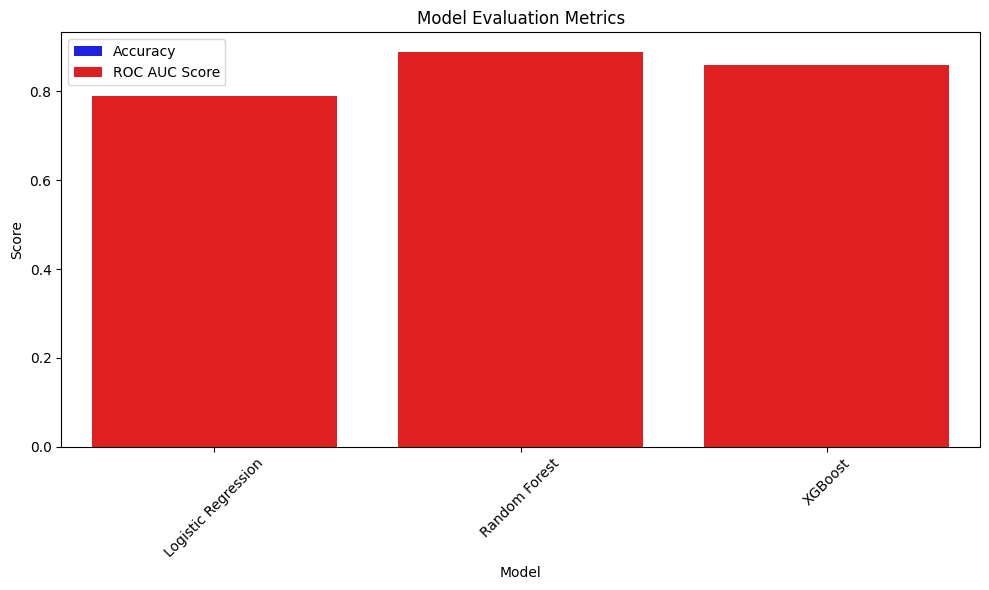

In [ ]:
# --- Visualizing evaluation Metric Score chart for accuracy and AUC-ROC ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, color='b', label='Accuracy')
sns.barplot(x='Model', y='ROC AUC Score', data=results_df, color='r', label='ROC AUC Score')
plt.title('Model Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm


# --- Hyperparameter tuning for XGBoost ---
print("\n--- Hyperparameter Tuning for XGBoost ---")
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                           param_grid=param_grid,
                           scoring='roc_auc_ovr_weighted', # Use appropriate scoring for multi-class AUC
                           cv=5, # 5-fold cross-validation
                           n_jobs=-1, # Use all available CPU cores
                           verbose=1) # Verbosity level for output

# Fit the grid search to the data (using 0-indexed resampled data)
grid_search.fit(X_train_resampled, y_train_resampled_0_indexed)

print(f'\nBest hyperparameters for XGBoost: {grid_search.best_params_}')

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Evaluate the best tuned XGBoost model and add to results_df
print("\n--- Evaluation of Best Tuned XGBoost Model ---")
accuracy_tuned_xgb, roc_auc_tuned_xgb = evaluate_model(best_xgb_model, X_test_pca, y_test_0_indexed, "XGBoost (Tuned)")
results_df = pd.concat([results_df, pd.DataFrame([{'Model': 'XGBoost (Tuned)', 'Accuracy': accuracy_tuned_xgb, 'ROC AUC Score': roc_auc_tuned_xgb}])], ignore_index=True)


# Predict on the model


--- Hyperparameter Tuning for XGBoost ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

--- Evaluation of Best Tuned XGBoost Model ---
Accuracy: 0.7091
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71      5799
           1       0.82      0.66      0.73     10635
           2       0.55      0.82      0.66      3566

    accuracy                           0.71     20000
   macro avg       0.69      0.74      0.70     20000
weighted avg       0.73      0.71      0.71     20000

ROC AUC Score: 0.8518


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:

# --- Saving the best performing ML model for deployment ---
# Determine the best model based on ROC AUC Score
best_model_row = results_df.loc[results_df['ROC AUC Score'].idxmax()]
best_model_name_for_save = best_model_row['Model']
best_model_instance = None

if "XGBoost" in best_model_name_for_save: # Check for both 'XGBoost' and 'XGBoost (Tuned)'
    if best_model_name_for_save == 'XGBoost (Tuned)':
        best_model_instance = best_xgb_model
    else: # If untuned XGBoost was somehow better, though unlikely after tuning
        best_model_instance = models['XGBoost']
elif best_model_name_for_save == 'Random Forest':
    best_model_instance = models['Random Forest']
elif best_model_name_for_save == 'Logistic Regression':
    best_model_instance = models['Logistic Regression']

print(best_model_name_for_save)

Random Forest


Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
!pip install lime

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.8 MB 10.7 MB/s eta 0:00:01
   ------------- -------------------------- 4.5/12.8 MB 11.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.8/12.8 MB 11.1 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.8 MB 11.3 MB/s eta 0:00:01
   ------------------------------------ --- 11.5/12.8 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 11.0 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283918 sha256=bc3db0b9bbae48435fd2aa4f45eee26af7d534b18ad24e


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



--- LIME Explanations ---
Intercept 0.31061001009733435
Prediction_local [0.10469652]
Right: 0.02
Intercept 0.4423995200498601
Prediction_local [0.37434445]
Right: 0.32
Intercept 0.23756694362682934
Prediction_local [0.5489682]
Right: 0.66

LIME Explanation for Poor:


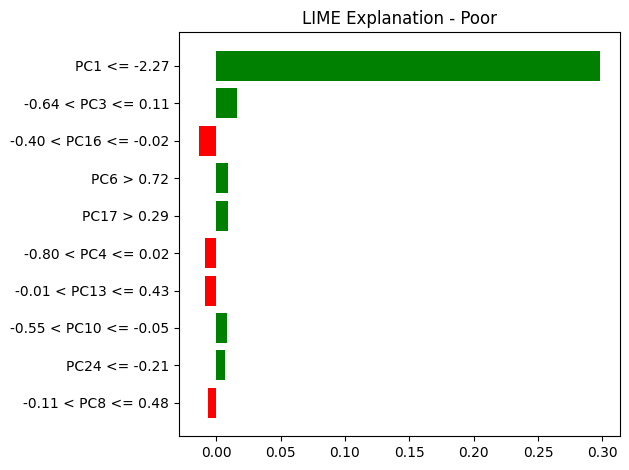


LIME Explanation for Standard:


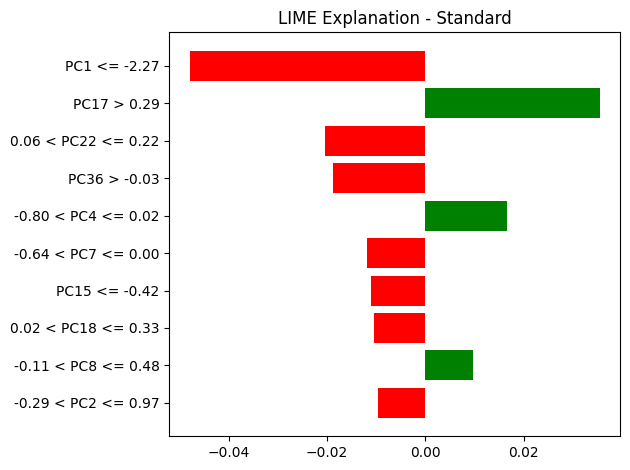


LIME Explanation for Good:


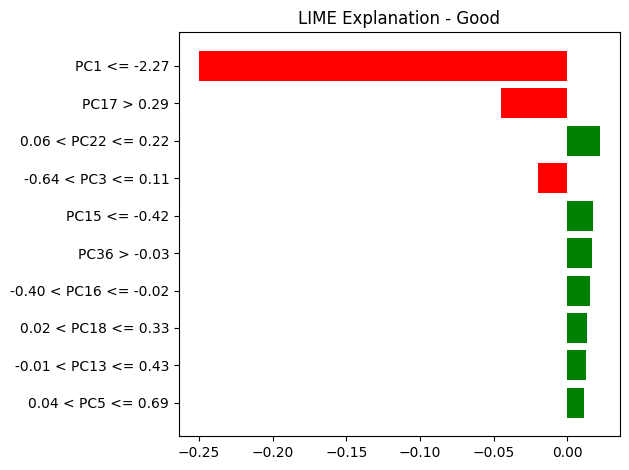

In [ ]:

from lime import lime_tabular

def explain_with_lime(model, X_train_pca, X_test_pca, class_names, feature_names):
    """Model explanation using LIME"""
    print("\n--- LIME Explanations ---")
    explainer = lime_tabular.LimeTabularExplainer(
        training_data=X_train_pca,
        feature_names=feature_names,
        class_names=class_names,
        mode='classification',
        verbose=True,
        random_state=42
    )

    # Explain first instance
    exp = explainer.explain_instance(
        data_row=X_test_pca[0],
        predict_fn=model.predict_proba,
        num_features=10,
        top_labels=len(class_names))

    # Visualize for each class
    for i in range(len(class_names)):
        print(f"\nLIME Explanation for {class_names[i]}:")
        fig = exp.as_pyplot_figure(label=i)
        plt.title(f'LIME Explanation - {class_names[i]}')
        plt.tight_layout()
        plt.show()

    return exp

# Usage example
class_names = ['Poor', 'Standard', 'Good']
pca_feature_names = [f'PC{i+1}' for i in range(X_test_pca.shape[1])]

# 3. LIME explanation
lime_explanation = explain_with_lime(
    best_model_instance,
    X_train_resampled,  # Use resampled training data
    X_test_pca,
    class_names,
    pca_feature_names)

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
if best_model_instance:
    model_filename = 'best_credit_score_prediction_model.joblib'
    joblib.dump(best_model_instance, model_filename)
    print(f"\nBest performing model '{best_model_name_for_save}' saved as '{model_filename}'")
    print(f"File size: {os.path.getsize(model_filename) / (1024*1024):.2f} MB")
else:
    print("\nCould not determine the best model instance to save.")



Best performing model 'Random Forest' saved as 'best_credit_score_prediction_model.joblib'
File size: 258.66 MB


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


First 10 predictions using the loaded model: [1 2 1 2 2 2 1 3 2 1]

Evaluation of the loaded model:
Accuracy: 0.7637
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      5799
           1       0.84      0.73      0.78     10635
           2       0.62      0.83      0.71      3566

    accuracy                           0.76     20000
   macro avg       0.74      0.78      0.75     20000
weighted avg       0.78      0.76      0.77     20000

ROC AUC Score: 0.8882

Comparison of Loaded Model Predictions vs Actual Credit Scores (First 10):


,Actual,Predicted
29322,2,1
23872,2,2
59885,1,1
54432,2,2
47864,1,2
65281,2,2
34788,1,1
72275,2,3
33712,2,2
69639,1,1


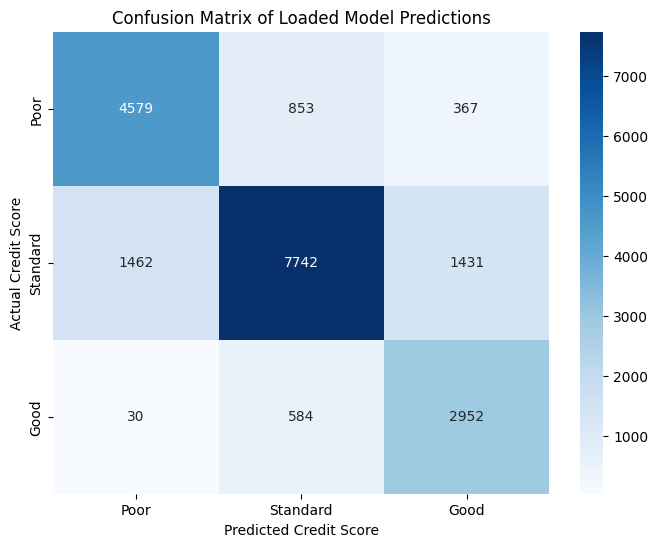

In [ ]:
# Load the File and predict unseen data.


# Load the saved model
loaded_model = joblib.load('best_credit_score_prediction_model.joblib')

# Make predictions on the test data
y_pred_loaded = loaded_model.predict(X_test_pca)

# Convert the 0-indexed predictions back to the original class labels (1, 2, 3)
y_pred_loaded_original_labels = y_pred_loaded + 1

# Display the first few predictions
print("First 10 predictions using the loaded model:", y_pred_loaded_original_labels[:10])

# You can also evaluate the loaded model to ensure it performs as expected
print("\nEvaluation of the loaded model:")
# Ensure y_test is also in original labels (1, 2, 3) for comparison if needed,
# but for evaluation metrics like classification_report, the 0-indexed version is expected if the model output is 0-indexed.
# Let's re-evaluate using the 0-indexed y_test for consistency with the model's output.
evaluate_model(loaded_model, X_test_pca, y_test_0_indexed, "Loaded Model")
# Display a comparison of predicted vs actual credit scores
print("\nComparison of Loaded Model Predictions vs Actual Credit Scores (First 10):")
comparison_df = pd.DataFrame({'Actual': y_test_0_indexed + 1, 'Predicted': y_pred_loaded + 1}) # Adding 1 back to convert 0-indexed to original labels
display(comparison_df.head(10))

# You can also look at the confusion matrix for a comprehensive comparison
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_0_indexed, y_pred_loaded) # Use 0-indexed for confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted Credit Score')
plt.ylabel('Actual Credit Score')
plt.title('Confusion Matrix of Loaded Model Predictions')
plt.show()

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***